In [1]:
import numpy as np 
import os
import matplotlib.pyplot as plt
import cv2
import glob
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
DATASET = 'STARE'

if DATASET == 'MENDELEY':
    PATH = '/content/drive/MyDrive/AV_split/'
    TRAIN_PATH = PATH+'train/'
    TRAIN_IMAGE_PATH = TRAIN_PATH + 'images'
    TRAIN_MASK_PATH = TRAIN_PATH + 'GT_vessel'
    SIZE = 512
    
    TEST_PATH = PATH+'test/'
    TEST_IMAGE_PATH = TEST_PATH + 'images'
    TEST_MASK_PATH = TEST_PATH + 'GT_vessel'
    SAVE_TEST_IMAGE_PATH = TEST_PATH + 'predict'
    
elif DATASET == 'STARE':
    PATH = '/content/drive/MyDrive/STARE/'
    TRAIN_PATH = PATH+'train/'
    TRAIN_IMAGE_PATH = TRAIN_PATH + 'images'
    TRAIN_MASK_PATH = TRAIN_PATH + 'GT'
    SIZE = 512
    
    TEST_PATH = PATH+'test/'
    TEST_IMAGE_PATH = TEST_PATH + 'images'
    TEST_MASK_PATH = TEST_PATH + 'GT'
    SAVE_TEST_IMAGE_PATH = TEST_PATH + 'predict'

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0.0 1.0
(512, 512, 1)
[0. 1.]


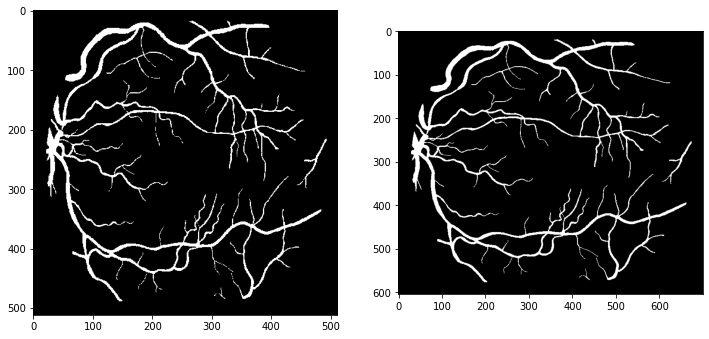

In [6]:
def mask_aug(mask):
    thresh = 128
    mask = cv2.threshold(mask, thresh, 255, cv2.THRESH_BINARY)[1]

    if DATASET == 'MENDELEY':
        mask = 255 - mask
        mask = mask[70:970, 200:1255]

    mask = cv2.resize(mask, (512, 512))
    mask = np.reshape(mask, mask.shape + (1,))
    
    mask = mask / 255

    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0

    return mask

def read_mask(mask_full_path):
    mask = cv2.imread(
        mask_full_path, 
        cv2.IMREAD_GRAYSCALE)
    mask = mask_aug(mask)

    return mask

def read_original_mask(mask_full_path):
    mask = cv2.imread(
        mask_full_path, 
        cv2.IMREAD_GRAYSCALE)

    return mask

if DATASET == 'MENDELEY':
    mask_full_path = '/content/drive/MyDrive/AV_split/train/GT_vessel/IM000001--vessels.jpg'
elif DATASET == 'STARE':
    mask_full_path = '/content/drive/MyDrive/STARE/train/GT/im0001.ah.ppm'

mask = read_mask(
        mask_full_path
    )
original_mask = read_original_mask(
        mask_full_path
    )

print(mask.min(), mask.max())
print(mask.shape)
print(np.unique(mask))

import random

num_image_dataset = len(os.listdir(TRAIN_IMAGE_PATH))
image_number = random.randint(0, num_image_dataset-1)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(mask, cmap='gray')
plt.subplot(122)
plt.imshow(cv2.cvtColor(original_mask, cv2.COLOR_BGR2RGB))

plt.show()

0.0 0.8705882352941177
(512, 512, 1)
[0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333 0.1372549
 0.14117647 0.14509804 0.14901961 0.15294118 0.15686275 0.16078431
 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.25490196
 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098  0.27843137
 0.28235294 0.28627451 0.29019608 0.29411765 0.29803922 0.30196078
 0.30588235 0.30980392 0.31372549 0.31764706 0.32156863 0.3254902
 0.32941176 0.33333333 0.33

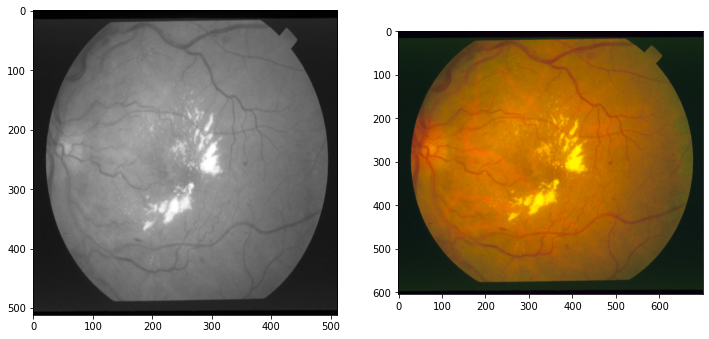

In [7]:
def image_aug(selected_image):
    # selecting channel
    # result_image = selected_image[:,:,1]
    result_image = selected_image

    # av_split img shape 1000, 1504
    if DATASET == 'MENDELEY':
      result_image = result_image[70:970, 200:1255]

    result_image = cv2.resize(result_image, (512, 512))
    result_image = np.reshape(result_image, result_image.shape + (1,))

    result_image = result_image / 255
    return result_image

def read_image(image_full_path):
    image = cv2.imread(
      image_full_path, cv2.IMREAD_GRAYSCALE
    )
    image = image_aug(image)

    return image

def read_original_image(image_full_path):
    image = cv2.imread(
      image_full_path
    )

    return image

# example
if DATASET == 'MENDELEY':
  path_img = '/content/drive/MyDrive/AV_split/train/images/IM000001.JPG'
elif DATASET == 'STARE':
  path_img = '/content/drive/MyDrive/STARE/train/images/im0001.ppm'

image = read_image(
    path_img
)
original_image = read_original_image(
    path_img
)

print(image.min(), image.max())
print(image.shape)
print(np.unique(image))

num_image_dataset = len(os.listdir(TRAIN_IMAGE_PATH))
image_number = random.randint(0, num_image_dataset-1)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image, cmap='gray')
# plt.subplot(122)
# plt.imshow(mask, cmap='gray')
plt.subplot(122)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

In [8]:
if DATASET == "MENDELEY":
    image_names = glob.glob(TRAIN_IMAGE_PATH + '/*.JPG')
    image_names.sort()

    images = [read_image(image) for image in image_names]
    image_dataset = np.array(images)

    mask_names = glob.glob(TRAIN_MASK_PATH + '/*.jpg')
    mask_names.sort()

    masks = [read_mask(mask) for mask in mask_names]
    mask_dataset = np.array(masks)
elif DATASET == "STARE":
    image_names = glob.glob(TRAIN_IMAGE_PATH + '/*.ppm')
    image_names.sort()

    images = [read_image(image) for image in image_names]
    image_dataset = np.array(images)

    mask_names = glob.glob(TRAIN_MASK_PATH + '/*.ppm')
    mask_names.sort()

    masks = [read_mask(mask) for mask in mask_names]
    mask_dataset = np.array(masks)

In [9]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (10, 512, 512, 1)
Mask data shape is:  (10, 512, 512, 1)
Max pixel value in image is:  0.9686274509803922
Labels in the mask are :  [0. 1.]


In [10]:
from sklearn.model_selection import train_test_split
from keras import utils

X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)

3


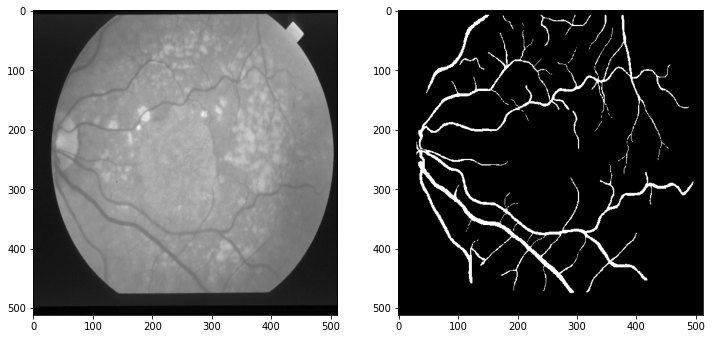

In [11]:
import random

image_number = random.randint(0, len(X_train)-1)
print(image_number)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')

plt.show()

In [12]:
def adjust_data(image, mask):
    """
        Some adjusting...
    """
    return (image, mask)

batch_size = 3
seed = 1

def train_generator(images, masks, aug_param:dict, batch_size:int):
    image_datagen = ImageDataGenerator(**aug_param)
    mask_datagen = ImageDataGenerator(**aug_param)
    image_generator = image_datagen.flow(
        images,
        seed = 1,
        batch_size = 3
    )
    mask_generator = mask_datagen.flow(
        masks,
        seed = 1,
        batch_size = 3
    )
    train_generator = zip(image_generator, mask_generator)
    for image, mask in train_generator:
        image, mask = adjust_data(image, mask)
        yield(image, mask)

In [13]:
datagen_args = dict(
    rotation_range = 0.3,
    width_shift_range = 0.05,
    height_shift_range = 0.05,
    shear_range = 0.1,
    # zoom_range = [0.7,1],
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.2,
)

datagen = train_generator(X_train, y_train, datagen_args, batch_size)

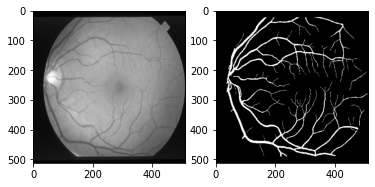

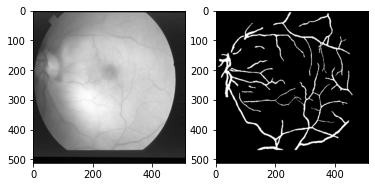

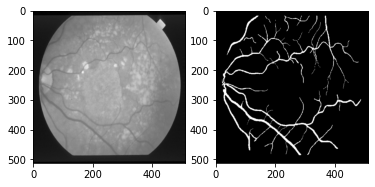

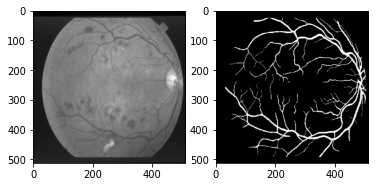

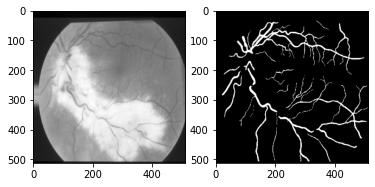

In [14]:
plt.figure()

for _ in range(5):
    img, label = next(datagen)
    plt.subplot(121)
    plt.imshow(img[0], cmap='gray')
    plt.subplot(122)
    plt.imshow(label[0], cmap='gray')
    plt.show()

In [15]:
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate

def unet(pretrained_weights = None,input_size = (512,512,1)):
    inputs = tf.keras.Input(shape=input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', dilation_rate=2,padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', dilation_rate=2,padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', dilation_rate=2,padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', dilation_rate=2, padding = 'same', kernel_initializer = 'he_normal')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    conv4 = BatchNormalization()(conv4)
    drop4 = Dropout(0.5)(conv4, training=True)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv5 = BatchNormalization()(conv5)
    drop5 = Dropout(0.5)(conv5, training=True)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
    

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
    

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
   
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = tf.keras.Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    

    if(pretrained_weights):
    	  model=keras.models.load_model(pretrained_weights)

    return model
     

In [16]:
model = unet()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = unet()
model_checkpoint = ModelCheckpoint('unet_mendeley.hdf5', monitor='loss', verbose=1, save_best_only=True)
callbacks = [ model_checkpoint ]
history = model.fit(
    datagen,
    steps_per_epoch=10,
    epochs=80,
    verbose=0,
    callbacks=callbacks)


Epoch 1: loss improved from inf to 0.30029, saving model to unet_mendeley.hdf5

Epoch 2: loss improved from 0.30029 to 0.19178, saving model to unet_mendeley.hdf5

Epoch 3: loss improved from 0.19178 to 0.16326, saving model to unet_mendeley.hdf5

Epoch 4: loss improved from 0.16326 to 0.14197, saving model to unet_mendeley.hdf5

Epoch 5: loss improved from 0.14197 to 0.13114, saving model to unet_mendeley.hdf5

Epoch 6: loss improved from 0.13114 to 0.11927, saving model to unet_mendeley.hdf5

Epoch 7: loss improved from 0.11927 to 0.11568, saving model to unet_mendeley.hdf5

Epoch 8: loss improved from 0.11568 to 0.10914, saving model to unet_mendeley.hdf5

Epoch 9: loss improved from 0.10914 to 0.10515, saving model to unet_mendeley.hdf5

Epoch 10: loss improved from 0.10515 to 0.10411, saving model to unet_mendeley.hdf5

Epoch 11: loss improved from 0.10411 to 0.10089, saving model to unet_mendeley.hdf5

Epoch 12: loss improved from 0.10089 to 0.09370, saving model to unet_mendele

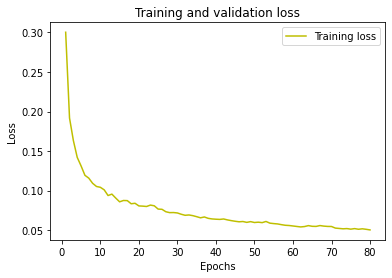

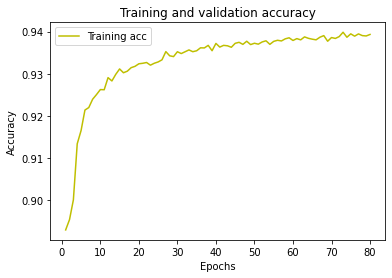

In [18]:
loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
max(history.history['accuracy'])

0.9398425221443176

(1, 512, 512, 1)
1/1 [==============================] - 0s 25ms/step
(512, 512)


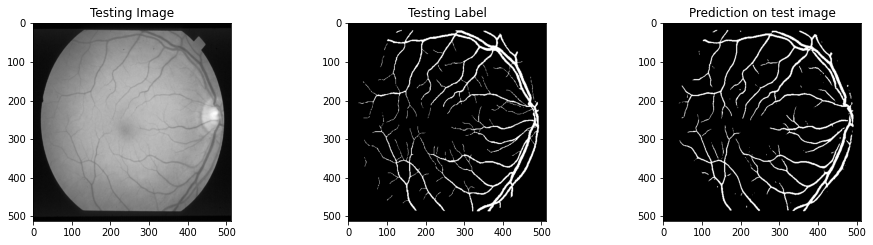

In [21]:
threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')
